# Bike sharing data analysis - Unsupervised Analysis of Days of Week

Learning Seattle's Work Habits from Bicycle Counts. Treating the crossings as features to learn about the relationships between various days.

Credit : Jake Vanderplas

<span style='color:Blue'>  
You Said It!
"Bicycling is a big part of the future. It has to be. There's something wrong with a society that drives a car to workout in a gym."
--Bill Nye
</span>    

## Data

The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge. The daily or hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the hourly dataset. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get data

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

<AxesSubplot:xlabel='time'>

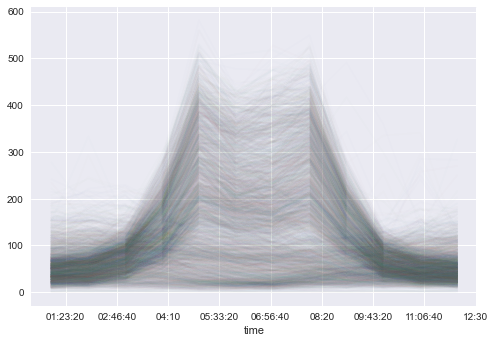

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(3163, 12)

In [5]:
X2 = PCA(2, svd_solver="full").fit_transform(X)
X2.shape

(3163, 2)

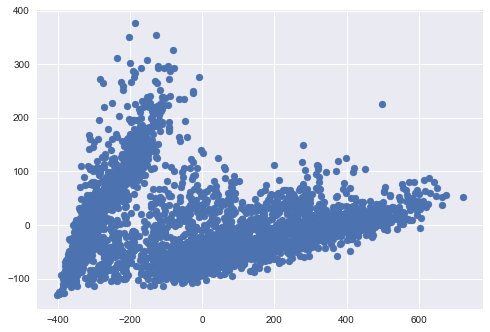

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

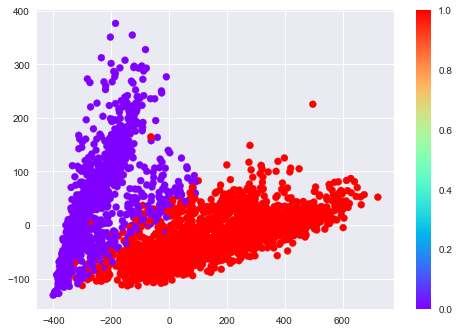

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap="rainbow")
plt.colorbar()

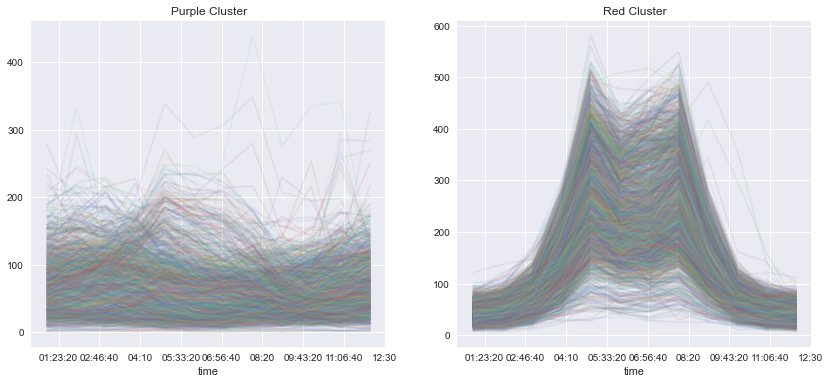

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

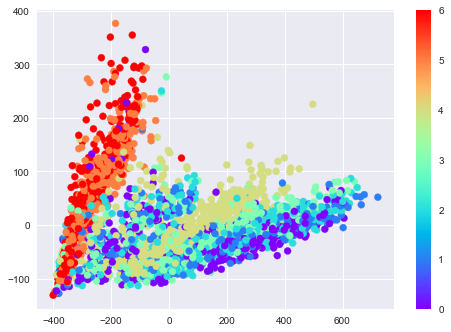

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap="rainbow")
plt.colorbar()

## Analyzing Outliers

The following points are weekdays with holiday like pattern


In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2021-05-07', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-25',
               '2021-05-26', '2021-05-27'],
              dtype='datetime64[ns]', length=1925, freq=None)

What's up with Feb 6, 2017? [Snow Storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)